In [1]:
import numpy as np
import pytest
import ase.units as units



from ase import Atoms, io
from ase.constraints import FixInternals

from ase.optimize.minimahopping import MinimaHopping
from ase.optimize.basin_mul import BasinHoppingm


from ase.calculators.lj import LennardJones
#from ase.optimize.basin_mul import BasinHoppingm
from ase.io import read
from ase.units import kB
from ase.calculators.tip4p import TIP4P, epsilon0, sigma0, rOH, angleHOH
from math import cos, sin, pi
from ase.calculators.qmmm import (SimpleQMMM, EIQMMM, LJInteractions,
                                  LJInteractionsGeneral)

from matplotlib import pyplot as plt

In [2]:
from tools.tip4p_cluster import tip4pcluster, tip4pcluster2
from tools.tip4p_cluster import add_tip4p_const

In [3]:
w5=tip4pcluster2(10, 3).water()

In [4]:

from ase.visualize import view
view(w5, viewer='x3d')



In [5]:
ro=w5.get_positions()

In [6]:
len(w5)

30

In [7]:
int(len(w5)/3)

10

In [8]:
cmold = w5.get_center_of_mass()

In [9]:
??BasinHoppingm.run()

Object `BasinHoppingm.run()` not found.


In [10]:
??MinimaHopping

In [24]:
!mkdir w5

mkdir: w5: File exists


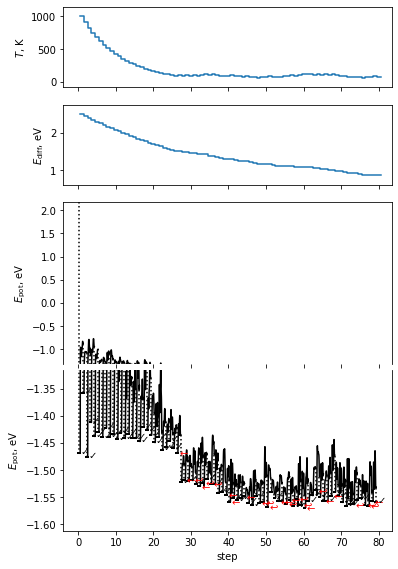

In [35]:
from ase.optimize.minimahopping import MHPlot

mhplot = MHPlot(logname='w5/hop_rd1.log')
mhplot.save_figure('md_w5_20step.png')

In [11]:
ls /Users/l-c/Downloads/h2o10/

lowest_basinm_w10_lar.traj    w10basin_1.log
lowest_basinm_w10_small.traj  w10basin_small.log


In [28]:
ftraj='/Users/l-c/Downloads/h2o10/lowest_basinm_w10_lar.traj'
import os
empty = os.path.getsize(ftraj)== 0
if not empty:
    traj = io.Trajectory(ftraj, 'r')
    w5minima = [add_tip4p_const(atoms) for atoms in traj]
else:
    w5minima = []
print(len(w5minima))


#io.write('h2o5.xyz', atoms)
from ase.visualize import view
view(w5minima[3], viewer='x3d')



10


In [29]:
ftraj='/Users/l-c/Downloads/h2o10/lowest_basinm_w10_small.traj'
import os
empty = os.path.getsize(ftraj)== 0
if not empty:
    traj = io.Trajectory(ftraj, 'r')
    w5minima = [add_tip4p_const(atoms) for atoms in traj]
else:
    w5minima = []
print(len(w5minima))


#io.write('h2o5.xyz', atoms)
from ase.visualize import view
view(w5minima[15], viewer='x3d')




21


In [49]:
w5minima[53].get_potential_energy()*96.485

-150.44091667324642

In [30]:
-3.278228*96.485

-316.29982858

In [31]:
-3.825725*96.485

-369.12507662499996

In [46]:
other = read(ftraj)
E2 = other.get_potential_energy()

NameError: name 'ftraj' is not defined

In [24]:
local= read('local_minima.traj')

In [26]:
read('lowest_basinm_w5.traj').get_potential_energy()

-2.493279715598333

In [ ]:
from ase.io.trajectory import Trajectory
traj = Trajectory('lowest_basinm_w5.traj')
atoms = traj[-1]

#io.write('h2o5.xyz', atoms)
from ase.visualize import view
view(atoms, viewer='x3d')

In [31]:
from ase.db import connect

lm = connect('local_minima.db')

In [33]:
for row in lm.select(relaxed = False):
    

In [45]:
i=0
for row in lm.select(id=0): 
    print(i)  
    i+=1

In [57]:
lm.get(id=15)

In [62]:
view(lm.get_atoms(selection = 'id=1'), viewer='x3d')

In [63]:
lm.get_atoms(selection = 'id=1')

AttributeError: 'Atoms' object has no attribute 'energy'

In [45]:

from ase import io
from math import cos, sin, pi
from ase import Atoms, io
import numpy as np
from ase.constraints import FixInternals
from ase.calculators.tip4p import TIP4P, epsilon0, sigma0, rOH, angleHOH
import ase.units as units
import numpy as np
import matplotlib.pyplot as plt
from ase.neb import NEBTools
from ase.io import read
import networkx as nx
import pandas as pd
import os 
import argparse
from ase.io.trajectory import Trajectory
import math 

import numpy as np
import pandas as pd
import networkx as nx

from tools.tip4p_cluster import tip4pcluster2
from tools.tip4p_cluster import add_tip4p_const
from tools.tip4p_cluster import prepare_graph


from ase import Atoms, io
from ase import units
from math import cos, sin, pi
from ase.calculators.tip4p import TIP4P, epsilon0, sigma0, rOH, angleHOH
from ase.constraints import FixInternals

In [46]:
ls /Users/l-c/Downloads/lowest_basinm_w10.traj

/Users/l-c/Downloads/lowest_basinm_w10.traj


In [47]:
ftraj='/Users/l-c/Downloads/lowest_basinm_w10.traj'
traj = io.Trajectory(ftraj, 'r')
minima = [atoms for atoms in traj]

In [48]:
len(minima)

12

In [50]:
from ase.visualize import view


view(minima[11], viewer='x3d')

In [28]:
??BasinHoppingm

In [10]:

# load minima 
ftraj = '/Users/l-c/Downloads/aseplayground/w10/lmw10_compact.traj'
empty = os.path.getsize(ftraj) == 0
if not empty:
    traj = io.Trajectory(ftraj, 'r')
    minima = [atoms for atoms in traj]
else:
    print('no minima founded')
    minima = []
nminima = len(minima)
print('# minima: ', nminima)
sep = math.floor(nminima/80)
minima=minima[-1::-sep]
nminima = len(minima)
print('# minima used: ', nminima)
LM = {}
for i in range(nminima):
    LM[str(i)] = add_tip4p_const(minima[i])

lmdf=pd.DataFrame(columns=['m1', 'E1'])
E = []
for lm in LM.values():
    add_tip4p_const(lm)
    E.append(lm.get_potential_energy())
lmdf['E1']=E
lmdf['m1']=LM.keys()
lmdf['m2']=LM.keys()
lmdf['E2']=E
trandir= "/Users/l-c/Downloads/aseplayground/w10_ts/ALLtraj/"

# minima:  232
# minima used:  116


In [15]:


# load transition states
transition_states=[name for name in os.listdir(trandir) if os.path.isfile(trandir+name) and os.path.getsize(trandir+name)>0]



In [16]:
transition_states

['113_89.traj',
 '39_37.traj',
 '35_14.traj',
 '29_37.traj',
 '74_107.traj',
 '103_66.traj',
 '105_18.traj',
 '113_66.traj',
 '61_75.traj',
 '51_93.traj',
 '4_7.traj',
 '69_15.traj',
 '71_75.traj',
 '20_95.traj',
 '83_6.traj',
 '84_115.traj',
 '56_110.traj',
 '100_76.traj',
 '10_73.traj',
 '30_95.traj',
 '56_97.traj',
 '16_9.traj',
 '58_66.traj',
 '44_45.traj',
 '107_72.traj',
 '97_100.traj',
 '56_78.traj',
 '13_34.traj',
 '96_100.traj',
 '17_115.traj',
 '80_37.traj',
 '96_49.traj',
 '9_3.traj',
 '55_87.traj',
 '45_87.traj',
 '47_55.traj',
 '104_62.traj',
 '12_19.traj',
 '35_102.traj',
 '60_19.traj',
 '25_55.traj',
 '39_76.traj',
 '68_79.traj',
 '29_76.traj',
 '110_100.traj',
 '70_19.traj',
 '44_113.traj',
 '115_59.traj',
 '44_53.traj',
 '27_87.traj',
 '98_41.traj',
 '84_62.traj',
 '4_77.traj',
 '0_34.traj',
 '71_34.traj',
 '79_54.traj',
 '80_21.traj',
 '10_32.traj',
 '106_49.traj',
 '5_3.traj',
 '110_37.traj',
 '83_66.traj',
 '29_21.traj',
 '25_108.traj',
 '85_18.traj',
 '58_27.traj',

In [14]:


def prepare_graph(transition_states, lmdf, trandir, log='@-7:'):
    Ed=[]
    for ts in transition_states:
        outputs = read(trandir + ts + log)
        for output in outputs:
            add_tip4p_const(output)
        nebtools = NEBTools(outputs)
        Ef, dE = nebtools.get_barrier()
        Ed.append([ts[:-5], Ef, Ed])
    Ed=pd.DataFrame(Ed, columns=['images', 'Ed', 'deltaE'])
    mins = Ed['images'].apply(lambda x: x.split("_"))
    min1=[]
    min2=[]
    revers=[]
    for line in mins:
        min1.append(line[0])
        min2.append(line[1])
        revers.append(line[1]+"_"+line[0])
    db = pd.DataFrame(columns=["m1", "m2", "Ed", "images"])


    db['m1'] = min1
    db['m2'] = min2
    db['Ed'] = Ed['Ed']
    db['images'] = Ed['images']
    db = db.merge(lmdf[['m2', 'E2']], how='left', on='m2')


    db = db.merge(lmdf[['m1', 'E1']], how='left', on='m1')
    db['ET'] = db['Ed'] + db['E1']
    db2 = pd.DataFrame(
        columns=["m1", "m2", "Ed", "images", "E2", "E1", "ET"])


    db2['m1'] = db["m2"]
    db2['m2'] = db["m1"]
    db2['ET'] = db['ET']
    db2['Ed'] = db['Ed']
    db2['E1'] = db["E2"]
    db2['E2'] = db["E1"]
    db2['images'] = revers
    new = pd.concat([db, db2])


    new = new[new["ET"] <= 0]
    new = new[new["E1"] <= new["ET"]]
    new = new[new["E2"] <= new["ET"]]
    dbnp = new.values


    g = nx.Graph()
    g.add_nodes_from(new['m1'])
    g.add_nodes_from(new['m2'])
    for line in dbnp:
        line[3] = line[0][4:] + '_' + line[1][4:]
        if line[2] != np.nan:
            g.add_edge(line[0], line[1], ts=[line[0], line[1], line[6]])
    return g, new
            




In [20]:
log='@-7:'
Ed=[]
i =0
for ts in transition_states:
    i=i+1
    print(i)
    outputs = read(trandir + ts + log)
    for output in outputs:
        add_tip4p_const(output)
    nebtools = NEBTools(outputs)
    Ef, dE = nebtools.get_barrier()
    Ed.append([ts[:-5], Ef, Ed])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [ ]:
Ed=pd.DataFrame(Ed, columns=['images', 'Ed', 'deltaE'])

In [ ]:

Ed=pd.DataFrame(Ed, columns=['images', 'Ed', 'deltaE'])
mins = Ed['images'].apply(lambda x: x.split("_"))
min1=[]
min2=[]
revers=[]
for line in mins:
    min1.append(line[0])
    min2.append(line[1])
    revers.append(line[1]+"_"+line[0])
db = pd.DataFrame(columns=["m1", "m2", "Ed", "images"])


db['m1'] = min1
db['m2'] = min2
db['Ed'] = Ed['Ed']
db['images'] = Ed['images']
db = db.merge(lmdf[['m2', 'E2']], how='left', on='m2')


db = db.merge(lmdf[['m1', 'E1']], how='left', on='m1')
db['ET'] = db['Ed'] + db['E1']
db2 = pd.DataFrame(
    columns=["m1", "m2", "Ed", "images", "E2", "E1", "ET"])


db2['m1'] = db["m2"]
db2['m2'] = db["m1"]
db2['ET'] = db['ET']
db2['Ed'] = db['Ed']
db2['E1'] = db["E2"]
db2['E2'] = db["E1"]
db2['images'] = revers
new = pd.concat([db, db2])


new = new[new["ET"] <= 0]
new = new[new["E1"] <= new["ET"]]
new = new[new["E2"] <= new["ET"]]
dbnp = new.values


g = nx.Graph()
g.add_nodes_from(new['m1'])
g.add_nodes_from(new['m2'])
for line in dbnp:
    line[3] = line[0][4:] + '_' + line[1][4:]
    if line[2] != np.nan:
        g.add_edge(line[0], line[1], ts=[line[0], line[1], line[6]])

In [ ]:


g, new= prepare_graph(transition_states, lmdf, trandir, log='@-' + '7' +  ':')


# plot 
from discon.disconnectivity import DisconnectivityGraph
dg=DisconnectivityGraph(g, csv_map=new, energy_csv=lmdf)
dg.calculate()
import matplotlib.pyplot as plt

dg.plot(title='W10')
plt.savefig('W10DISCOss.png')



